In [1]:
import pandas as pd
import pymssql
import matplotlib.pyplot as plt
from secrets import *

In [2]:
def getDB(server, database, user, password):
    conn = pymssql.connect(server=server,
                          database=database,
                          user=user,
                          password=password,
                          login_timeout=300,
                          port=1433)
    cursor = conn.cursor()
    return cursor

In [3]:
def get_sql():
    cursor = getDB(server, db, uid, pwd)
    query = """SELECT  a.xdid,  a.roadname,  b.RoadNumber, a.direction, b.Miles, b.County, 
    b.District, b.StartLat, b.StartLong, b.StartPoint, b.EndLat, b.EndLong, b.EndPoint, b.geo, b.geog
    FROM udf_xdpos_details('2018-12-03') a
    INNER JOIN [dbo].[__xd] b ON a.xdid=b.XDSegID
    WHERE b.version = '2018-12-03'
    """
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall())
    return df    

In [4]:
df = get_sql()

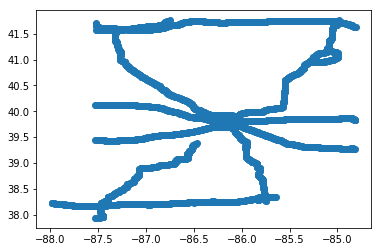

In [5]:
plt.plot(df[8], df[7], 'o')